# Detection on one trace

Here, we want to test the detection method in one trace

In [1]:
import matplotlib.pyplot as plt

import analysis
import catalog
import figures
import histograms

catalog.display_params_for_catalog()

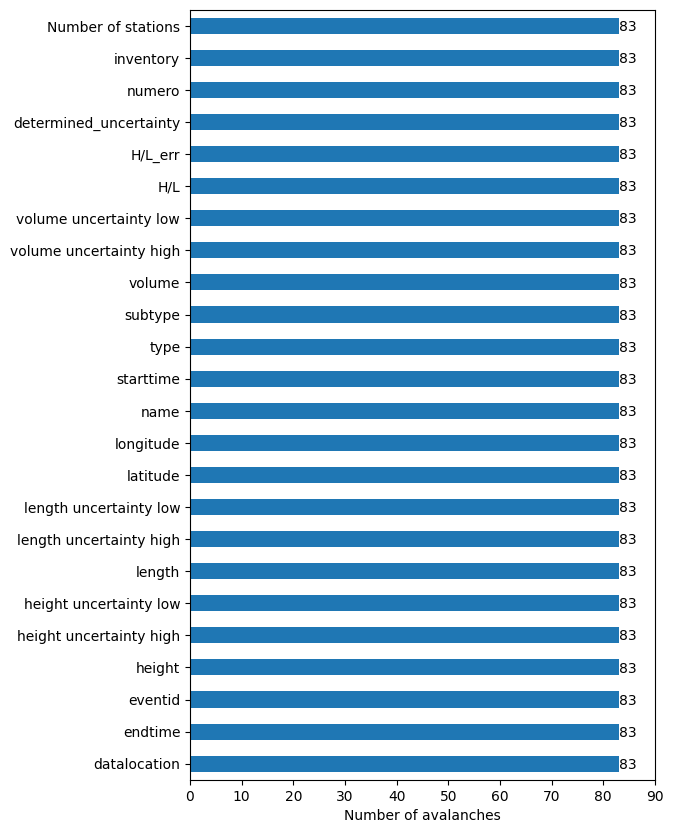

In [2]:
ESEC_avalanches = catalog.load("catalog/6_ESEC_avalanches_83.pickle")

histograms.open_catalog(ESEC_avalanches, pos_number=0.15, xlim=90)

## Chose one event and one trace

In [3]:
event_index = 0
trace_index = 0

In [4]:
#The seismic data of the stream is filtered, detrend and their instrumental response is removed. We kept only the component Z
_, _, trace = analysis.filter_stream(ESEC_avalanches, event_index, trace_index, freq_HP=9, freq_LP=0.5)

#Detection method
time_start_detection, data_start_detection, trimmed_time, trimmed_data, time_raw, data_raw, seuil_haut, seuil_bas, _ = analysis.methode_de_detection_totale(trace, ESEC_avalanches, event_index, -30, 10, detection_yes_or_no=[], index=0)

The distance of the trace is 48.81039753705775
Detection on trace 0


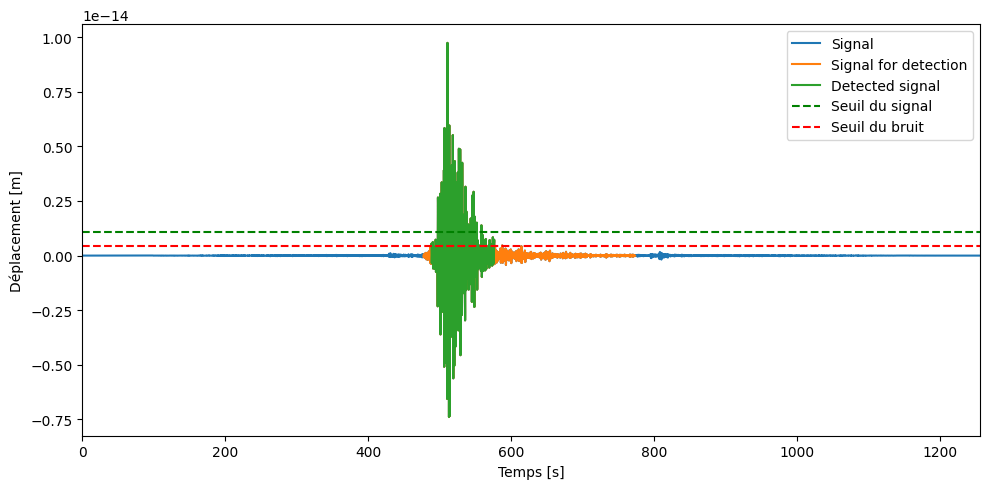

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(time_raw, data_raw, label = "Signal")
ax.plot(time_start_detection, data_start_detection, "C1", label="Signal for detection")
ax.plot(trimmed_time, trimmed_data, "C2", label="Detected signal")

ax.axhline(seuil_haut, color="g", label="Seuil du signal", linestyle="--")
ax.axhline(seuil_bas, color="r", label="Seuil du bruit", linestyle="--")

ax.set_xlabel("Temps [s]")
ax.set_ylabel("Déplacement [m]")
ax.set_xlim(time_raw[0], time_raw[-1])
ax.legend()
figures.save(f"figures/detected_method_on_trace_{trace_index}_in_event_{event_index}")
plt.show()